In [103]:
def str_to_num_weekday(weekday: str):
    if weekday == 'Monday': return 1
    if weekday == 'Tuesday': return 2
    if weekday == 'Wednesday': return 3
    if weekday == 'Thursday': return 4
    if weekday == 'Friday': return 5
    if weekday == 'Saturday': return 6
    if weekday == 'Sunday': return 7
        
traffic_situation_map = {
    'low': 0,
    'normal': 1,
    'heavy': 2,
    'high': 3
}

In [152]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd
import datetime

data = pd.read_csv('traffic.csv', dtype={'Date': 'int', 'Traffic Situation': 'string'})

# Transform str 'Day of the week' to int to make it ordinal
data['Day of the week'] = data['Day of the week'].map(lambda d: str_to_num_weekday(d))

# transform Date and Time to Timestamp
data['Date'] = data.apply(lambda row: pd.Timestamp(
    year=2023, 
    month=1, 
    day=row['Date'],
    hour=datetime.datetime.strptime(row['Time'], '%I:%M:%S %p').hour,
    minute=datetime.datetime.strptime(row['Time'], '%I:%M:%S %p').minute
), axis=1)
data = data.drop(['Time'], axis='columns')
_ = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2976 non-null   datetime64[ns]
 1   Day of the week    2976 non-null   int64         
 2   CarCount           2976 non-null   int64         
 3   BikeCount          2976 non-null   int64         
 4   BusCount           2976 non-null   int64         
 5   TruckCount         2976 non-null   int64         
 6   Total              2976 non-null   int64         
 7   Traffic Situation  2976 non-null   string        
dtypes: datetime64[ns](1), int64(6), string(1)
memory usage: 186.1 KB


In [139]:
X = data
X['Date'] = pd.to_numeric(pd.to_datetime(X['Date']))

X_train, X_test, y_train, y_test = train_test_split(
    X.drop('Traffic Situation', axis='columns'),
    X['Traffic Situation'].map(traffic_situation_map),
    train_size=0.8
)

clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)

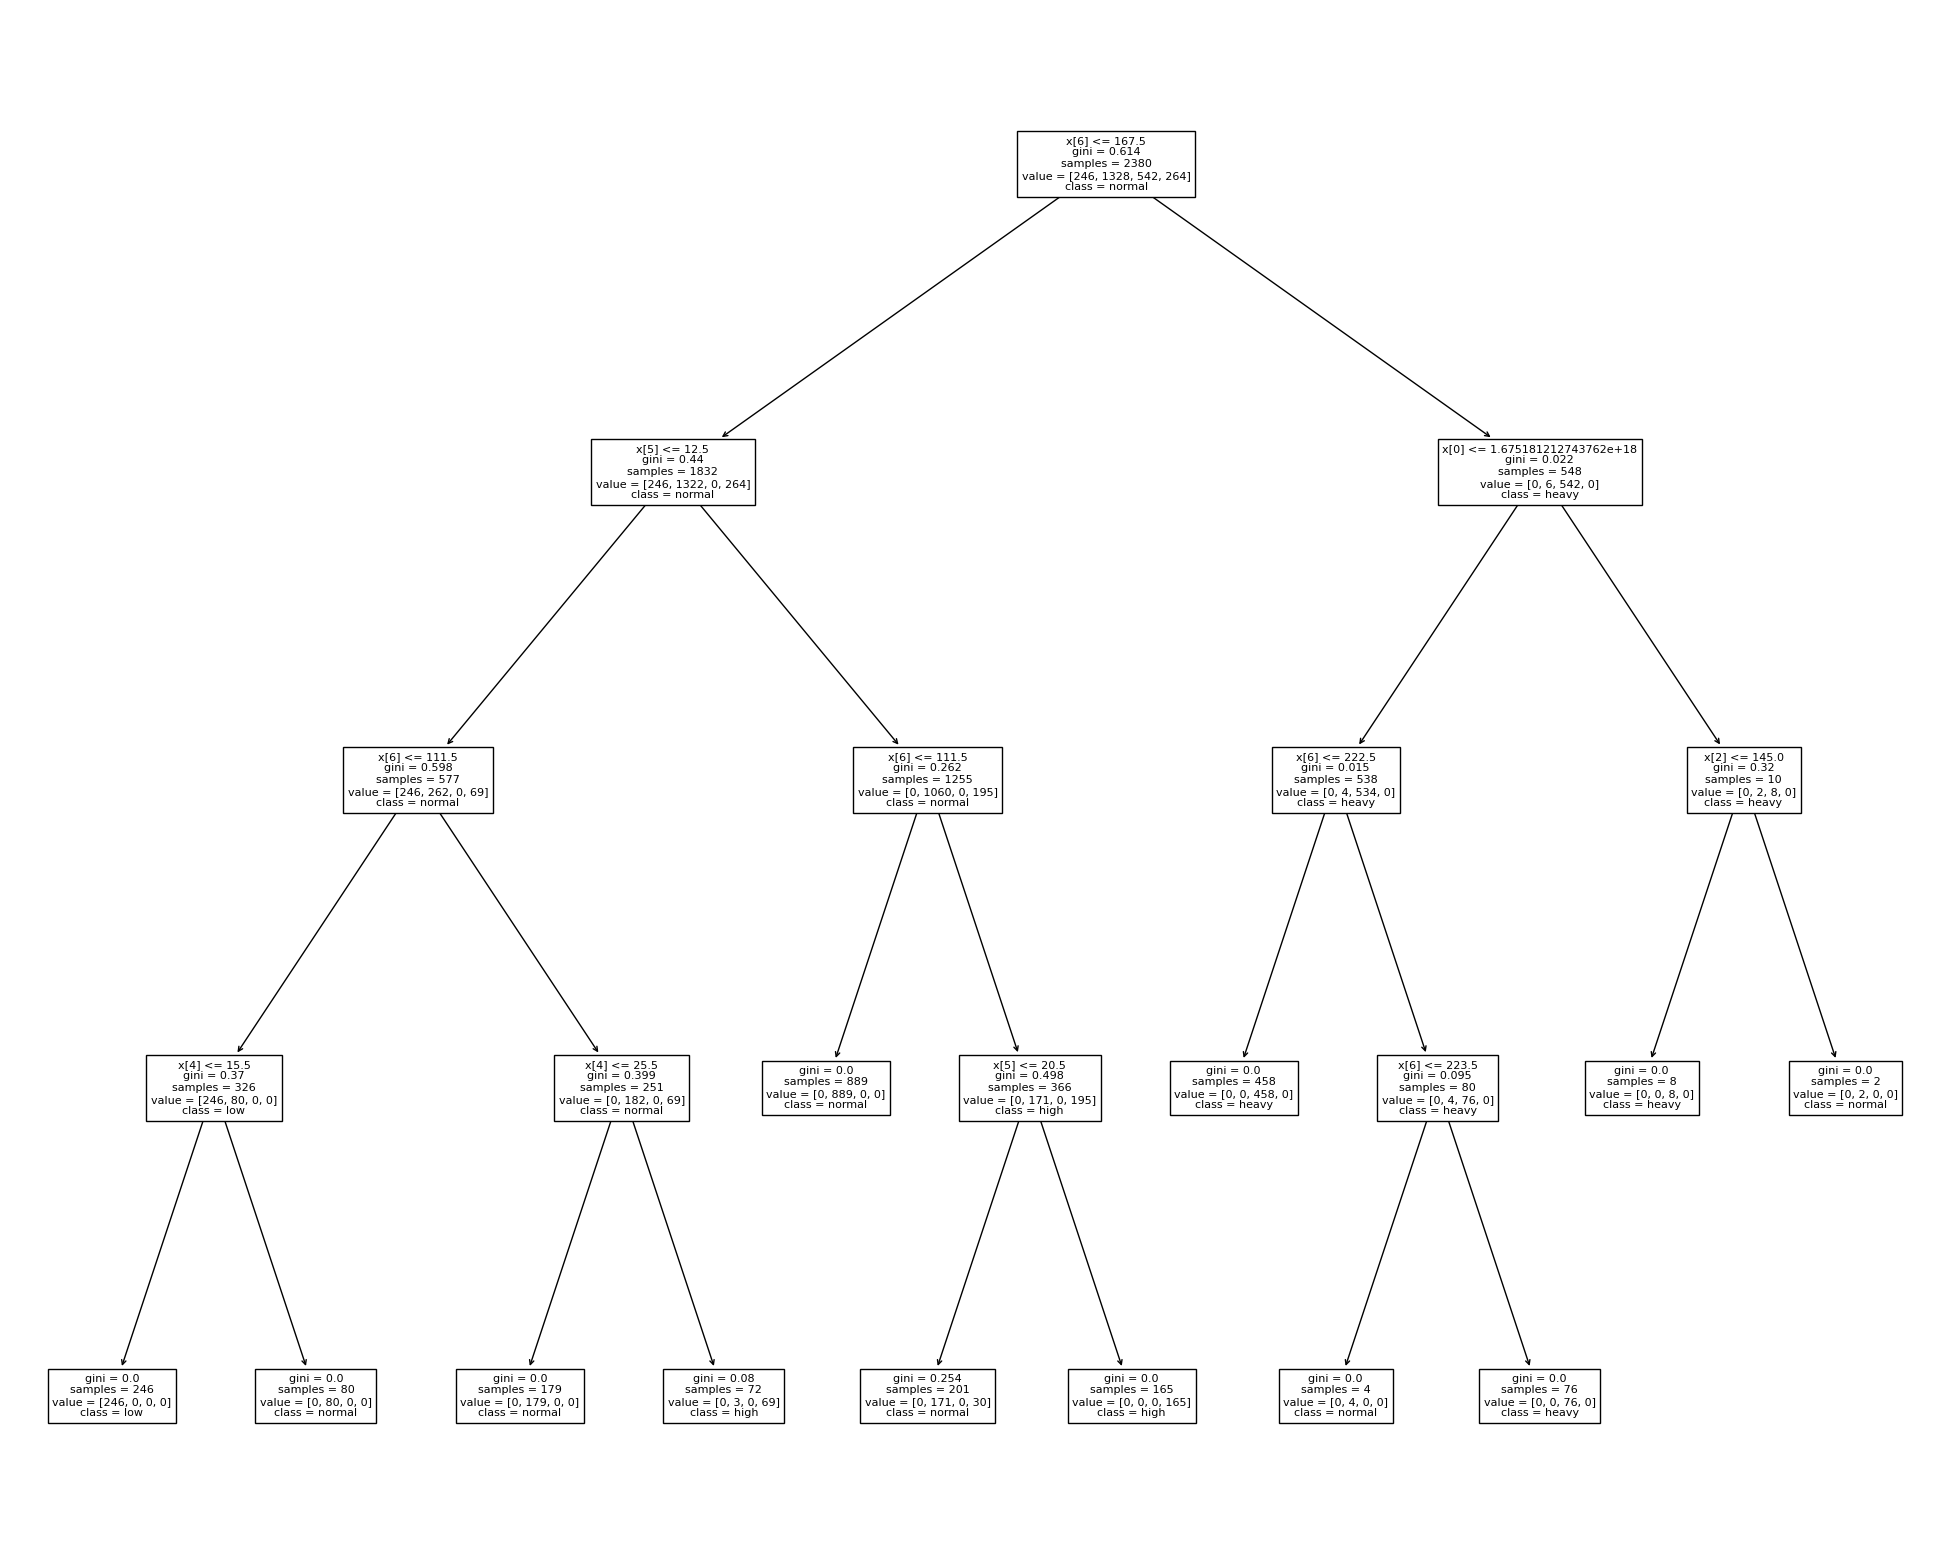

In [140]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, class_names=list(traffic_situation_map.keys())) #, feature_names=X.columns.values, class_names=clf.classes_, filled=True)

Decision tree has accuracy: 0.9916107382550335


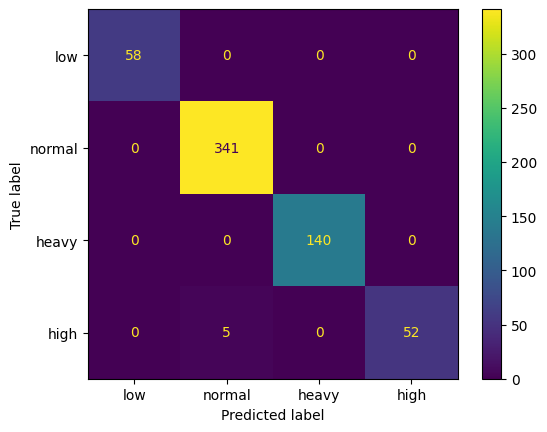

In [153]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Decision tree has accuracy:', accuracy)
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred, labels=clf.classes_), 
    display_labels=list(traffic_situation_map.keys())
)
_ = disp.plot()